# Arquitecturas individuales CNN



In [1]:
# Cargar repositorio
!git clone https://github.com/Diego99021999/Proyecto_Deep_Learning_Diego_Lopez

Cloning into 'Proyecto_Deep_Learning_Diego_Lopez'...
remote: Enumerating objects: 459, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 459 (delta 2), reused 6 (delta 2), pack-reused 453
Receiving objects: 100% (459/459), 390.33 MiB | 21.72 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Updating files: 100% (401/401), done.


In [2]:
# Importar librerias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import clone_model, load_model
from keras.callbacks import ModelCheckpoint

In [3]:
import random
import pickle
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import random
random.seed(10)

In [4]:
# Funciones importantes
def normalize(images):
  norm = np.abs(images)
  norm -= norm.min()
  norm = norm/norm.max()
  return norm

def get_images(filenames, labels):

  all_images = []
  all_labels = []

  for (i, file) in enumerate(filenames):
    with open(file, 'rb') as f:
      lista = pickle.load(f)

    all_images += lista
    all_labels.append(labels[i]*np.ones(len(lista)))

  return normalize(np.expand_dims(np.array(all_images), axis = 3)), normalize(np.hstack(all_labels))


## Modelo con Espectrogramas

In [5]:
# Definir modelo

model = models.Sequential()
# Convolutional Layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 91, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

#Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 89, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 29, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 42, 29, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 27, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 13, 16)       0         
 2D)                                                             
                                                        

In [6]:
#Paths
ruta = "/content/Proyecto_Deep_Learning_Diego_Lopez/local/spectrograms"

# Get list of filenames
labels = []
files = [f for f in listdir(ruta) if (isfile(join(ruta, f)))]
random.shuffle(files)
for i in range(len(files)):
    files[i] = ruta + "/" + files[i]
    labels.append(0 if 'HC' in files[i] else 1)

labels = np.array(labels)
files = np.array(files)

Epoch 1/10
73/73 [==============================] - 13s 15ms/step - loss: 0.7110 - accuracy: 0.5557 - val_loss: 0.6884 - val_accuracy: 0.5517
Epoch 2/10
73/73 [==============================] - 1s 7ms/step - loss: 0.5846 - accuracy: 0.6975 - val_loss: 0.7245 - val_accuracy: 0.4483
Epoch 3/10
73/73 [==============================] - 1s 7ms/step - loss: 0.5151 - accuracy: 0.7589 - val_loss: 0.8494 - val_accuracy: 0.4483
Epoch 4/10
73/73 [==============================] - 0s 7ms/step - loss: 0.4041 - accuracy: 0.8247 - val_loss: 1.1423 - val_accuracy: 0.4483
Epoch 5/10
73/73 [==============================] - 1s 7ms/step - loss: 0.3207 - accuracy: 0.8706 - val_loss: 0.7004 - val_accuracy: 0.5439
Epoch 6/10
73/73 [==============================] - 1s 8ms/step - loss: 0.2463 - accuracy: 0.9046 - val_loss: 0.6691 - val_accuracy: 0.6129
Epoch 7/10
73/73 [==============================] - 1s 7ms/step - loss: 0.1890 - accuracy: 0.9261 - val_loss: 2.2139 - val_accuracy: 0.5517
Epoch 8/10
73/73 [

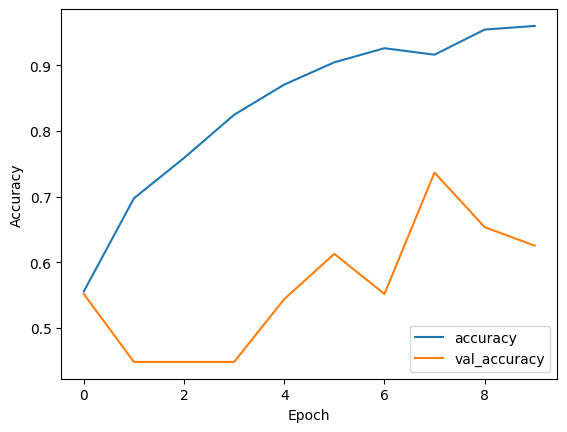

20/20 - 0s - loss: 0.5600 - accuracy: 0.7367 - 203ms/epoch - 10ms/step

______________________________________________
Epoch 1/10
76/76 [==============================] - 4s 18ms/step - loss: 0.6851 - accuracy: 0.6153 - val_loss: 0.6905 - val_accuracy: 0.5345
Epoch 2/10
76/76 [==============================] - 1s 8ms/step - loss: 0.5596 - accuracy: 0.7068 - val_loss: 0.6833 - val_accuracy: 0.5273
Epoch 3/10
76/76 [==============================] - 1s 7ms/step - loss: 0.4536 - accuracy: 0.7901 - val_loss: 0.7270 - val_accuracy: 0.5345
Epoch 4/10
76/76 [==============================] - 1s 7ms/step - loss: 0.3656 - accuracy: 0.8364 - val_loss: 0.6693 - val_accuracy: 0.5800
Epoch 5/10
76/76 [==============================] - 1s 7ms/step - loss: 0.3119 - accuracy: 0.8646 - val_loss: 1.2777 - val_accuracy: 0.5345
Epoch 6/10
76/76 [==============================] - 1s 7ms/step - loss: 0.2337 - accuracy: 0.9043 - val_loss: 1.3424 - val_accuracy: 0.5345
Epoch 7/10
76/76 [======================

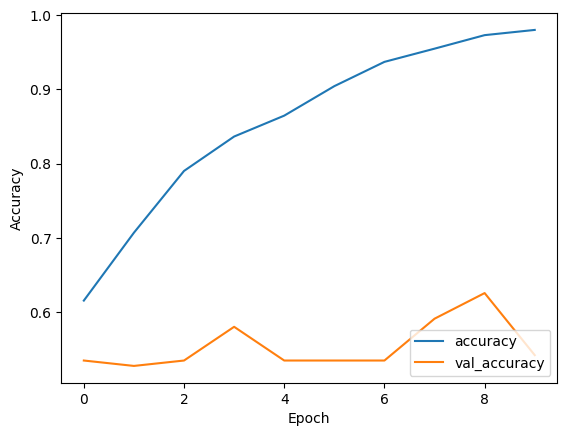

18/18 - 0s - loss: 0.9874 - accuracy: 0.6255 - 196ms/epoch - 11ms/step

______________________________________________
Epoch 1/10
73/73 [==============================] - 3s 12ms/step - loss: 0.7334 - accuracy: 0.4906 - val_loss: 0.6939 - val_accuracy: 0.4642
Epoch 2/10
73/73 [==============================] - 1s 9ms/step - loss: 0.6747 - accuracy: 0.5916 - val_loss: 0.6924 - val_accuracy: 0.5358
Epoch 3/10
73/73 [==============================] - 1s 9ms/step - loss: 0.6091 - accuracy: 0.7243 - val_loss: 0.6911 - val_accuracy: 0.5358
Epoch 4/10
73/73 [==============================] - 1s 9ms/step - loss: 0.5324 - accuracy: 0.7898 - val_loss: 0.6906 - val_accuracy: 0.5358
Epoch 5/10
73/73 [==============================] - 1s 7ms/step - loss: 0.4735 - accuracy: 0.8438 - val_loss: 0.6915 - val_accuracy: 0.5358
Epoch 6/10
73/73 [==============================] - 1s 7ms/step - loss: 0.4237 - accuracy: 0.8733 - val_loss: 0.6923 - val_accuracy: 0.5469
Epoch 7/10
73/73 [======================

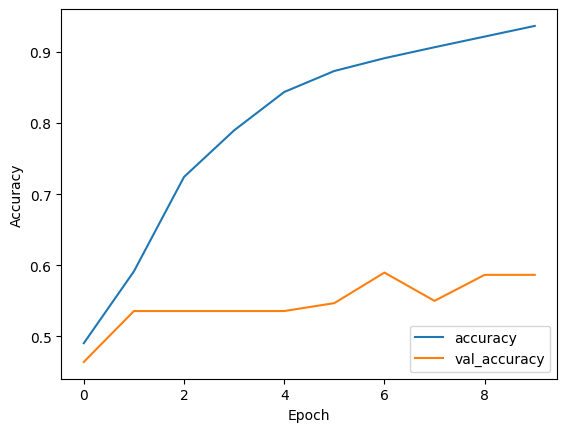

20/20 - 0s - loss: 0.7885 - accuracy: 0.5898 - 205ms/epoch - 10ms/step

______________________________________________
Epoch 1/10
74/74 [==============================] - 3s 14ms/step - loss: 0.6331 - accuracy: 0.6551 - val_loss: 0.7397 - val_accuracy: 0.4224
Epoch 2/10
74/74 [==============================] - 1s 7ms/step - loss: 0.4195 - accuracy: 0.8111 - val_loss: 0.7565 - val_accuracy: 0.4224
Epoch 3/10
74/74 [==============================] - 1s 7ms/step - loss: 0.3064 - accuracy: 0.8679 - val_loss: 0.9314 - val_accuracy: 0.4224
Epoch 4/10
74/74 [==============================] - 1s 7ms/step - loss: 0.2040 - accuracy: 0.9239 - val_loss: 1.2449 - val_accuracy: 0.4224
Epoch 5/10
74/74 [==============================] - 1s 10ms/step - loss: 0.1295 - accuracy: 0.9607 - val_loss: 0.7296 - val_accuracy: 0.5296
Epoch 6/10
74/74 [==============================] - 1s 9ms/step - loss: 0.0761 - accuracy: 0.9778 - val_loss: 1.9347 - val_accuracy: 0.4192
Epoch 7/10
74/74 [=====================

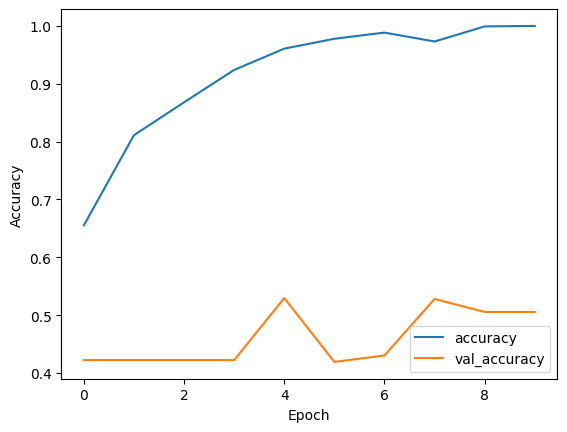

20/20 - 0s - loss: 0.7296 - accuracy: 0.5296 - 216ms/epoch - 11ms/step

______________________________________________
Epoch 1/10
77/77 [==============================] - 4s 14ms/step - loss: 0.6612 - accuracy: 0.6302 - val_loss: 0.7912 - val_accuracy: 0.4895
Epoch 2/10
77/77 [==============================] - 1s 7ms/step - loss: 0.4307 - accuracy: 0.8022 - val_loss: 1.1946 - val_accuracy: 0.4895
Epoch 3/10
77/77 [==============================] - 1s 7ms/step - loss: 0.2995 - accuracy: 0.8726 - val_loss: 2.2952 - val_accuracy: 0.4895
Epoch 4/10
77/77 [==============================] - 1s 7ms/step - loss: 0.2109 - accuracy: 0.9132 - val_loss: 1.8080 - val_accuracy: 0.4895
Epoch 5/10
77/77 [==============================] - 1s 10ms/step - loss: 0.1420 - accuracy: 0.9451 - val_loss: 1.8546 - val_accuracy: 0.4608
Epoch 6/10
77/77 [==============================] - 1s 12ms/step - loss: 0.0784 - accuracy: 0.9758 - val_loss: 1.2763 - val_accuracy: 0.4685
Epoch 7/10
77/77 [====================

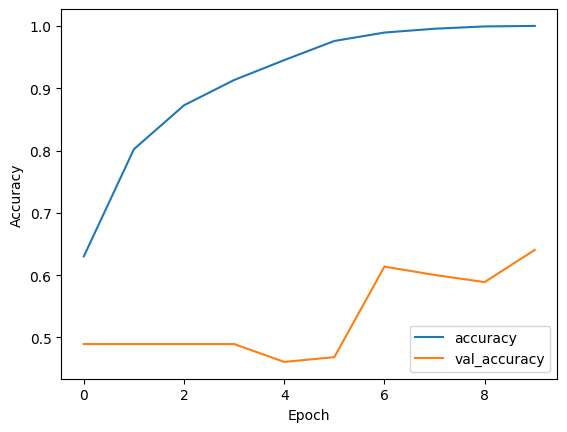

17/17 - 0s - loss: 1.7245 - accuracy: 0.6405 - 181ms/epoch - 11ms/step

______________________________________________


In [7]:
# Definir splits 5-fold crossvalidation

skf = StratifiedKFold(n_splits=5)

all_preds = []
all_test = []
acc_test = []

for i, (train_index, test_index) in enumerate(skf.split(files, labels)):

  # Extraer imagenes y etiquetas
  tr_images, tr_labels = get_images(files[train_index], labels[train_index])
  ts_images, ts_labels = get_images(files[test_index], labels[test_index])

  # Callback
  filepath = './my_best_model.hdf5'
  checkpoint = ModelCheckpoint(filepath=filepath,
                                monitor='val_accuracy',
                                verbose=0,
                                save_best_only=True,
                                mode='max')
  callbacks = [checkpoint]

  # Entrenar Modelo
  optimizer = Adam(0.001)

  model_cloned = clone_model(model)
  model_cloned.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  history = model_cloned.fit(tr_images, tr_labels, epochs=10,
                              validation_data=(ts_images, ts_labels),
                              callbacks=callbacks)

  model_cloned = load_model(filepath)
  all_preds.append(model_cloned.predict(ts_images))
  all_test.append(ts_labels)


  # Graficar historia de entrenamiento
  plt.figure()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  test_loss, test_acc = model_cloned.evaluate(ts_images,  ts_labels, verbose=2)
  acc_test.append(test_acc)
  print('\n______________________________________________')


In [8]:
# Accuracy promedio
val = np.mean(acc_test)
print(f'El Accuracy de prueba promedio entre los 5 folds es de {val:.3} ')

El Accuracy de prueba promedio entre los 5 folds es de 0.624 


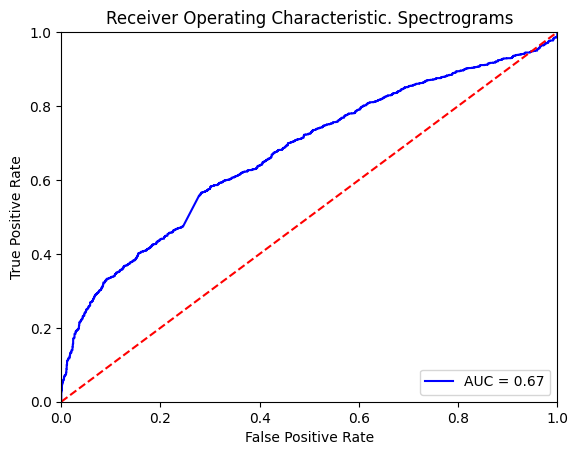

In [9]:
import sklearn.metrics as metrics

# Graficar Curva ROC
all_preds1 = np.vstack(all_preds)
all_test1 = np.hstack(all_test)

fpr, tpr, threshold = metrics.roc_curve(all_test1, all_preds1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic. Spectrograms')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelo con atractores

In [10]:
# Definir modelo

model1 = models.Sequential()
# Convolutional Layers
model1.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(182, 182, 1)))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(16, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
#Fully connected layers
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 60, 60, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 58, 58, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                      

In [11]:
#Paths
ruta =  "/content/Proyecto_Deep_Learning_Diego_Lopez/local/attractors"

# Get list of filenames
labels = []
files = [f for f in listdir(ruta) if (isfile(join(ruta, f)))]
random.shuffle(files)
for i in range(len(files)):
    files[i] = ruta + "/" + files[i]
    labels.append(0 if 'HC' in files[i] else 1)

labels = np.array(labels)
files = np.array(files)


Epoch 1/10
74/74 [==============================] - 4s 20ms/step - loss: 0.9455 - accuracy: 0.6269 - val_loss: 0.6886 - val_accuracy: 0.6208
Epoch 2/10
74/74 [==============================] - 1s 12ms/step - loss: 0.4372 - accuracy: 0.8000 - val_loss: 0.6819 - val_accuracy: 0.5968
Epoch 3/10
74/74 [==============================] - 1s 13ms/step - loss: 0.2865 - accuracy: 0.8863 - val_loss: 0.8125 - val_accuracy: 0.5248
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.1545 - accuracy: 0.9581 - val_loss: 0.8735 - val_accuracy: 0.4960
Epoch 5/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0761 - accuracy: 0.9829 - val_loss: 0.7647 - val_accuracy: 0.5232
Epoch 6/10
74/74 [==============================] - 1s 12ms/step - loss: 0.0294 - accuracy: 0.9991 - val_loss: 1.2001 - val_accuracy: 0.4992
Epoch 7/10
74/74 [==============================] - 1s 12ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 1.1593 - val_accuracy: 0.5552
Epoch 8/10
74

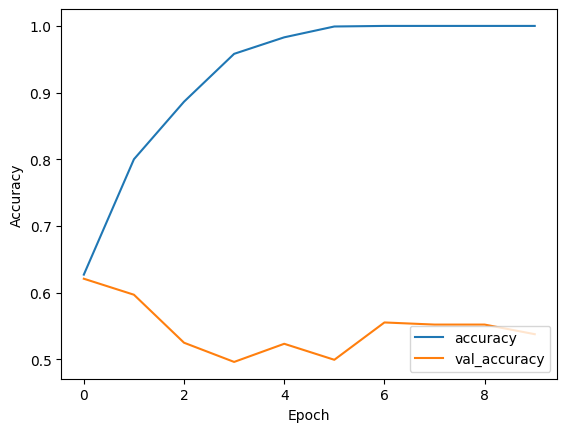

20/20 - 0s - loss: 0.6886 - accuracy: 0.6208 - 247ms/epoch - 12ms/step

______________________________________________
Epoch 1/10
72/72 [==============================] - 4s 25ms/step - loss: 0.8357 - accuracy: 0.6373 - val_loss: 0.7298 - val_accuracy: 0.4977
Epoch 2/10
72/72 [==============================] - 1s 13ms/step - loss: 0.3518 - accuracy: 0.8571 - val_loss: 0.7991 - val_accuracy: 0.4992
Epoch 3/10
72/72 [==============================] - 1s 15ms/step - loss: 0.1925 - accuracy: 0.9418 - val_loss: 0.8059 - val_accuracy: 0.5023
Epoch 4/10
72/72 [==============================] - 1s 14ms/step - loss: 0.0972 - accuracy: 0.9713 - val_loss: 1.7663 - val_accuracy: 0.4977
Epoch 5/10
72/72 [==============================] - 1s 16ms/step - loss: 0.0468 - accuracy: 0.9891 - val_loss: 0.9576 - val_accuracy: 0.5385
Epoch 6/10
72/72 [==============================] - 1s 13ms/step - loss: 0.0147 - accuracy: 0.9996 - val_loss: 1.1246 - val_accuracy: 0.5354
Epoch 7/10
72/72 [=================

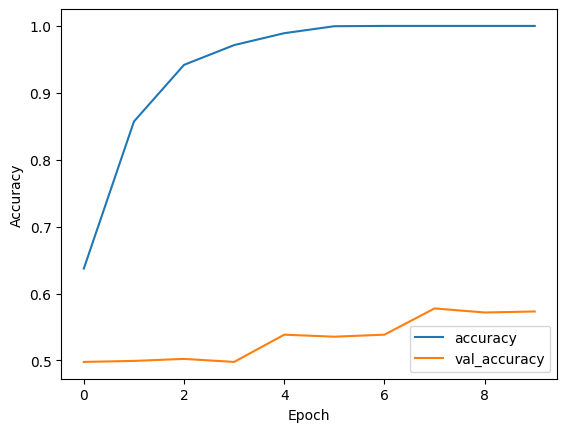

21/21 - 0s - loss: 1.2523 - accuracy: 0.5777 - 242ms/epoch - 12ms/step

______________________________________________
Epoch 1/10
76/76 [==============================] - 4s 25ms/step - loss: 0.8661 - accuracy: 0.6239 - val_loss: 0.7196 - val_accuracy: 0.4944
Epoch 2/10
76/76 [==============================] - 1s 12ms/step - loss: 0.4783 - accuracy: 0.7592 - val_loss: 0.8617 - val_accuracy: 0.4944
Epoch 3/10
76/76 [==============================] - 1s 12ms/step - loss: 0.3198 - accuracy: 0.8573 - val_loss: 0.8234 - val_accuracy: 0.4944
Epoch 4/10
76/76 [==============================] - 1s 12ms/step - loss: 0.1291 - accuracy: 0.9592 - val_loss: 1.5949 - val_accuracy: 0.4944
Epoch 5/10
76/76 [==============================] - 1s 12ms/step - loss: 0.0458 - accuracy: 0.9959 - val_loss: 1.8339 - val_accuracy: 0.4944
Epoch 6/10
76/76 [==============================] - 1s 14ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 1.5483 - val_accuracy: 0.4963
Epoch 7/10
76/76 [=================

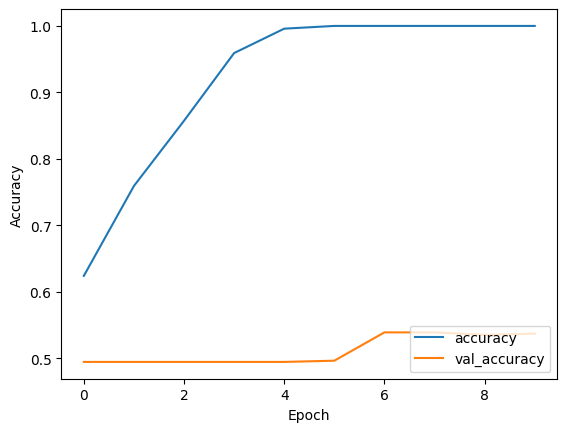

17/17 - 0s - loss: 1.6769 - accuracy: 0.5389 - 230ms/epoch - 14ms/step

______________________________________________
Epoch 1/10
75/75 [==============================] - 4s 23ms/step - loss: 0.7483 - accuracy: 0.6609 - val_loss: 0.6863 - val_accuracy: 0.5385
Epoch 2/10
75/75 [==============================] - 1s 12ms/step - loss: 0.3814 - accuracy: 0.8387 - val_loss: 0.8118 - val_accuracy: 0.5368
Epoch 3/10
75/75 [==============================] - 1s 12ms/step - loss: 0.2049 - accuracy: 0.9269 - val_loss: 0.9934 - val_accuracy: 0.5368
Epoch 4/10
75/75 [==============================] - 1s 12ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 1.4040 - val_accuracy: 0.5368
Epoch 5/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0561 - accuracy: 0.9912 - val_loss: 1.2500 - val_accuracy: 0.5419
Epoch 6/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0185 - accuracy: 0.9996 - val_loss: 1.4931 - val_accuracy: 0.5607
Epoch 7/10
75/75 [=================

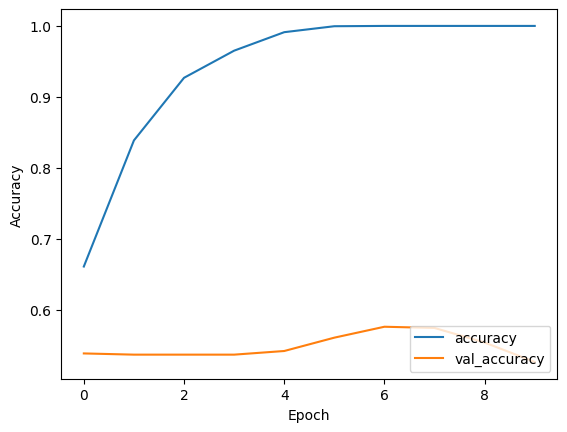

19/19 - 0s - loss: 1.2868 - accuracy: 0.5761 - 245ms/epoch - 13ms/step

______________________________________________
Epoch 1/10
76/76 [==============================] - 4s 23ms/step - loss: 0.9040 - accuracy: 0.6067 - val_loss: 0.6933 - val_accuracy: 0.5091
Epoch 2/10
76/76 [==============================] - 1s 13ms/step - loss: 0.4725 - accuracy: 0.7886 - val_loss: 0.6898 - val_accuracy: 0.5707
Epoch 3/10
76/76 [==============================] - 1s 12ms/step - loss: 0.3531 - accuracy: 0.8479 - val_loss: 0.6965 - val_accuracy: 0.5163
Epoch 4/10
76/76 [==============================] - 1s 12ms/step - loss: 0.2307 - accuracy: 0.9155 - val_loss: 0.7084 - val_accuracy: 0.5054
Epoch 5/10
76/76 [==============================] - 1s 13ms/step - loss: 0.1369 - accuracy: 0.9648 - val_loss: 0.8414 - val_accuracy: 0.5417
Epoch 6/10
76/76 [==============================] - 1s 12ms/step - loss: 0.1028 - accuracy: 0.9714 - val_loss: 0.9776 - val_accuracy: 0.5163
Epoch 7/10
76/76 [=================

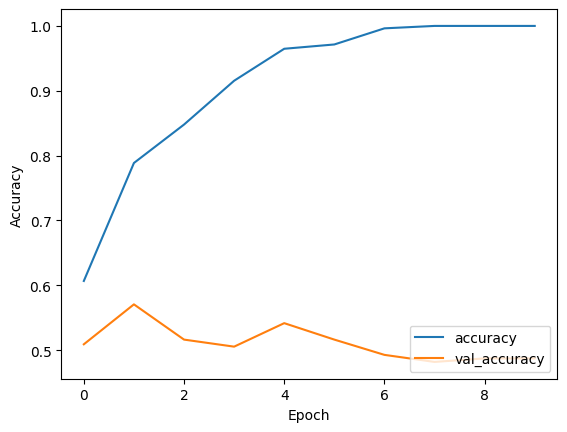

18/18 - 0s - loss: 0.6898 - accuracy: 0.5707 - 222ms/epoch - 12ms/step

______________________________________________


In [12]:
# Definir splits 5-fold crossvalidation

skf = StratifiedKFold(n_splits=5)

all_preds = []
all_test = []
acc_test = []

for i, (train_index, test_index) in enumerate(skf.split(files, labels)):

  # Extraer imagenes y etiquetas
  tr_images, tr_labels = get_images(files[train_index], labels[train_index])
  ts_images, ts_labels = get_images(files[test_index], labels[test_index])

  # Callback
  filepath = './my_best_model.hdf5'
  checkpoint = ModelCheckpoint(filepath=filepath,
                                monitor='val_accuracy',
                                verbose=0,
                                save_best_only=True,
                                mode='max')
  callbacks = [checkpoint]

  # Entrenar Modelo
  optimizer = Adam(0.001)

  model_cloned = clone_model(model1)
  model_cloned.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  history = model_cloned.fit(tr_images, tr_labels, epochs=10,
                              validation_data=(ts_images, ts_labels),
                              callbacks=callbacks)

  model_cloned = load_model(filepath)
  all_preds.append(model_cloned.predict(ts_images))
  all_test.append(ts_labels)


  # Graficar historia de entrenamiento
  plt.figure()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  test_loss, test_acc = model_cloned.evaluate(ts_images,  ts_labels, verbose=2)
  acc_test.append(test_acc)
  print('\n______________________________________________')


In [13]:
# Accuracy promedio
val = np.mean(acc_test)
print(f'El Accuracy de prueba promedio entre los 5 folds es de {val:.3} ')

El Accuracy de prueba promedio entre los 5 folds es de 0.577 


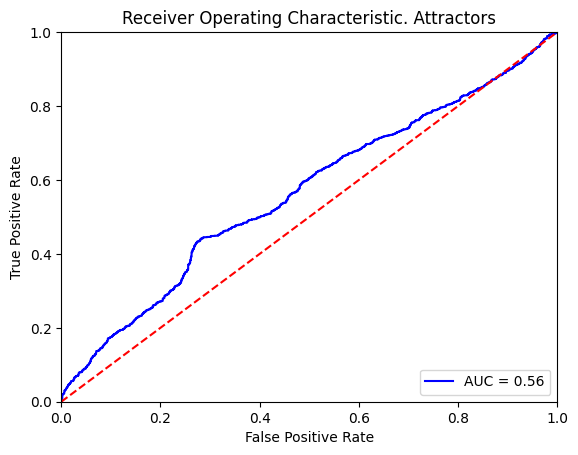

In [14]:
#all_preds1 = np.round(np.vstack(all_preds))
all_preds1 = np.vstack(all_preds)
all_test1 = np.hstack(all_test)

fpr, tpr, threshold = metrics.roc_curve(all_test1, all_preds1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic. Attractors')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()